In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 13]

# Convolutional Neural Networks

### CNNs are Neural Networks typically used for images processing or classification

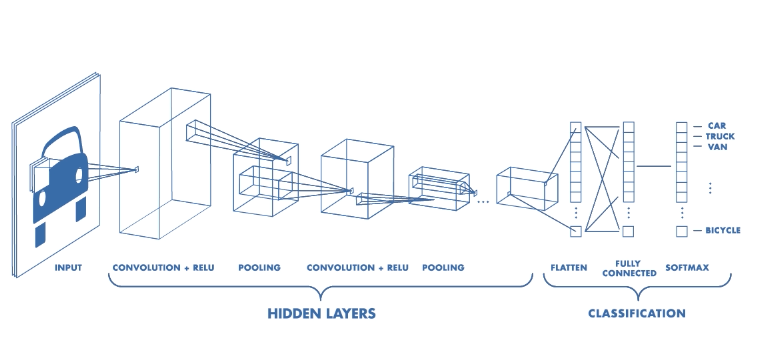

Architecture of a CNN. — Source: https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html

### Various concepts are shown here, which may be a little obscure:
    - 'Hidden' layers
    - Convolution layer
    - ReLU
    - Pooling
    - 'Fully Connected'
    - SoftMax
    
Let's go over these...

## but first, let's look at a simple neural network

### see Simple Neural Network with PyTorch

## Let's continue with Convolutional Neural Network

### - Convolution

See the Convolution tutorial to understand kernel convolutions

In a neural network, the **kernel**, is the matrix of weights that are being trained.
A kernel, in essence, learns to recognize a specific 'feature' (edges, orientation of the edge, etc...)

A Convolution layer in a Convolutional Neural Network, learns to recognize many features at once, by convoluting the input image with many kernels at once.

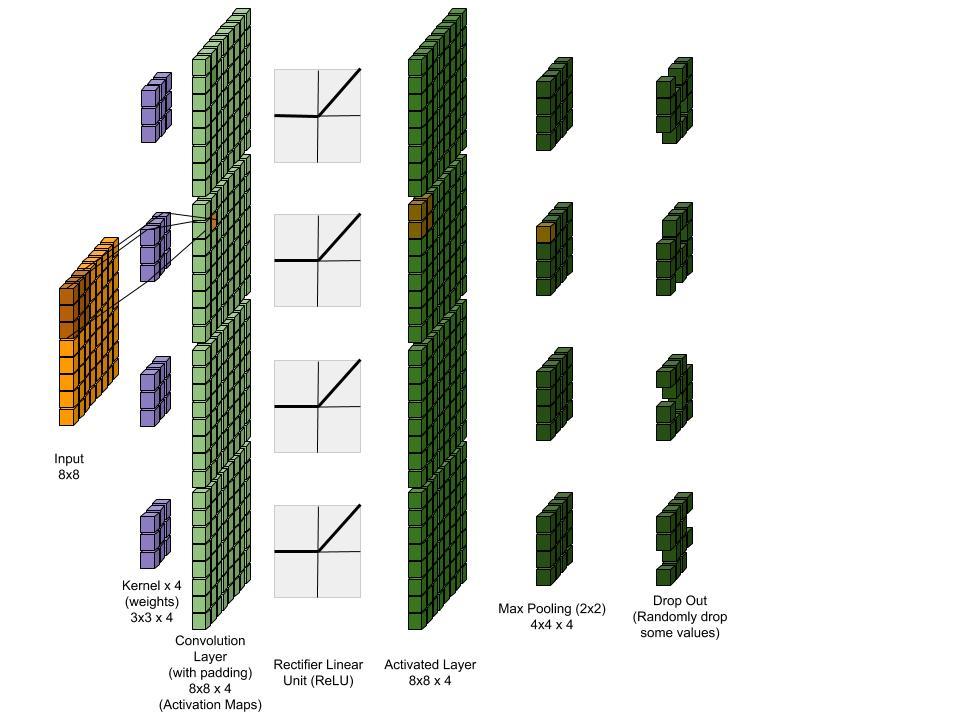

We'll see in the StrideNet model we will build later that each Conv2d layer implements more and more kernels (32, 64, 128...) each learning to recognize more and more abstract features.

The first layers learn to recognize details, then deeper layer build on those layers while polling pixels together, learning to recognize more general (abstract) features from the previous layers)

In [9]:
# let's get our Zebra picture
img1 = plt.imread('zebra.jpg')
# grayscale + normalize
gray1 = np.mean(img1[...,:3], -1)

# convert to Tensor object for PyTorch
gray1 = torch.Tensor(np.array(gray1, dtype=float))

In [10]:
h, w = gray1.size()
print(gray1.size())

torch.Size([141, 250])


In [16]:
# simple Convolution2D layer with 1 layer as input (gray scale) and 3 layers as output (3 kernels)
model = nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)

# apply Conv2d to our zebra image (reshape to fit the required format)
output = model(gray1.reshape(1, 1, h, w))
output.size()

torch.Size([1, 3, 141, 250])

In [17]:
# the output has 3 layers. Extract as numpy array and squeeze to recover a 3D array
output = output.detach().numpy().squeeze()

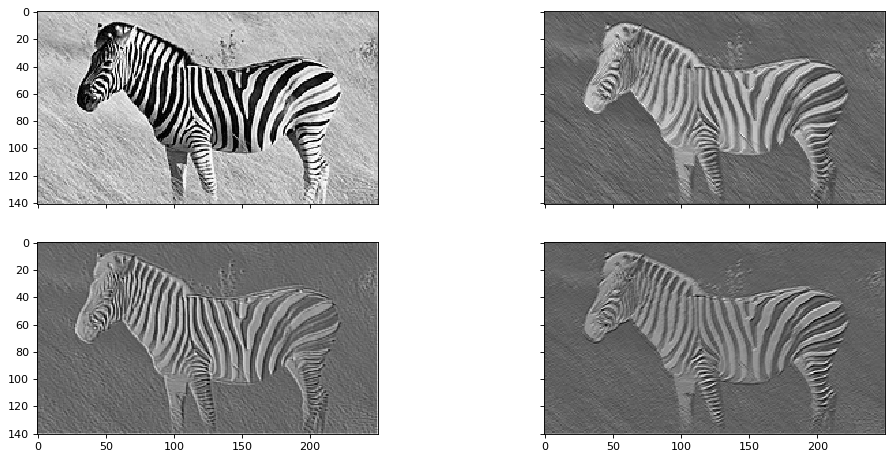

In [18]:
# plot the 3 layers along with the original image
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
ax[0,0].imshow(gray1, cmap='gray')
ax[0,1].imshow(output[0], cmap='gray')
ax[1,0].imshow(output[1], cmap='gray')
ax[1,1].imshow(output[2], cmap='gray')

### Note: if you re-run the code, you'll see different results, because the kernels are initialized randomly each time you create the model

In [20]:
# let's look at the kernel weights
[p for p in model.parameters()]

[Parameter containing:
 tensor([[[[-0.1948, -0.1116, -0.0796],
           [ 0.0602, -0.1653,  0.0982],
           [-0.0259,  0.1820, -0.1216]]],
 
 
         [[[-0.0103, -0.1641, -0.1826],
           [ 0.2673,  0.3263, -0.2222],
           [-0.1193, -0.0186, -0.2193]]],
 
 
         [[[ 0.0314,  0.1373,  0.0893],
           [ 0.0734, -0.1583, -0.2731],
           [-0.2803, -0.0514,  0.1469]]]], requires_grad=True),
 Parameter containing:
 tensor([0.1247, 0.1156, 0.1641], requires_grad=True)]

### - Activation Layer (ReLU)

See the info on activation layer

### - Pooling layer
